In [65]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [67]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [68]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [69]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
numerical_cols = df_market_data.select_dtypes(include=['float64', 'int64']).columns

In [70]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame
# Set the coin_id column as index
# Display the scaled DataFrame
df_market_data_scaled = df_market_data.copy()
df_market_data_scaled[numerical_cols] = scaler.fit_transform(df_market_data[numerical_cols])
print(df_market_data_scaled.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [71]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [72]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled[numerical_cols])
    inertia_values.append(kmeans.inertia_)


c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [73]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({
    'k': k_values,
    'Inertia': inertia_values
})

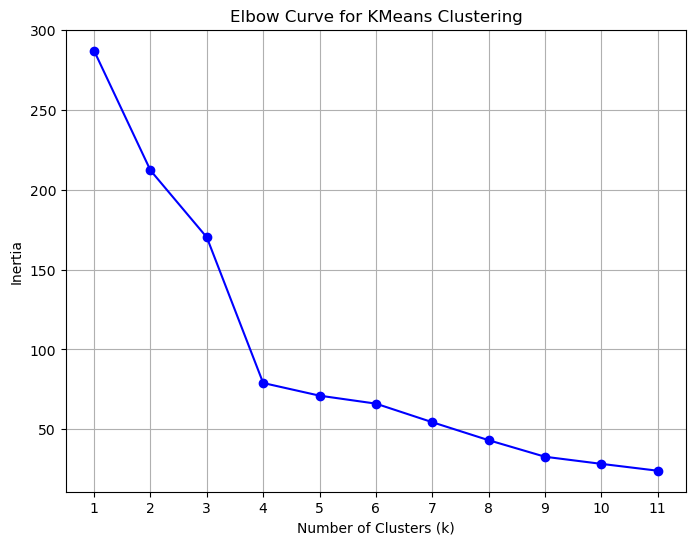

In [74]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_data['k'], elbow_data['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [75]:
# Initialize the K-Means model using the best value for k
k_best = 4
kmeans = KMeans(n_clusters=k_best, random_state=1)


In [76]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled[numerical_cols])


c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [77]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_market_data_scaled[numerical_cols])

# Print the resulting array of cluster values.
print("Cluster labels: ", clusters)

Cluster labels:  [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [78]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()


In [79]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
# Display the copy of the scaled DataFrame
df_market_data_scaled_copy['Cluster'] = clusters
print(df_market_data_scaled_copy.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [80]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c='Cluster', 
    colormap='viridis',
    hover_cols=["coin_id"],  # Display the crypto name in the hover tool
    title="Cryptocurrency Clusters",
    width=800, 
    height=400
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [81]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [82]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_components = pca.fit_transform(df_market_data_scaled[numerical_cols])
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
# View the scaled PCA data
print(df_pca.head(10))

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715
5 -0.516534  1.388377  0.804071
6 -0.450711  0.517699  2.846143
7 -0.345600  0.729439  1.478013
8 -0.649468  0.432165  0.600303
9 -0.759014 -0.201200 -0.217653


In [83]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

Explained variance by each component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Explained variance by each component: [0.3719856  0.34700813 0.17603793]

In [84]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
coin_ids = df_market_data.index
df_market_data_pca['coin_id'] = coin_ids

# Set the coin_id column as index
df_market_data_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_market_data_pca.head(10))

                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [85]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [86]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_pca)
    inertia_values.append(kmeans.inertia_)

c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [87]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

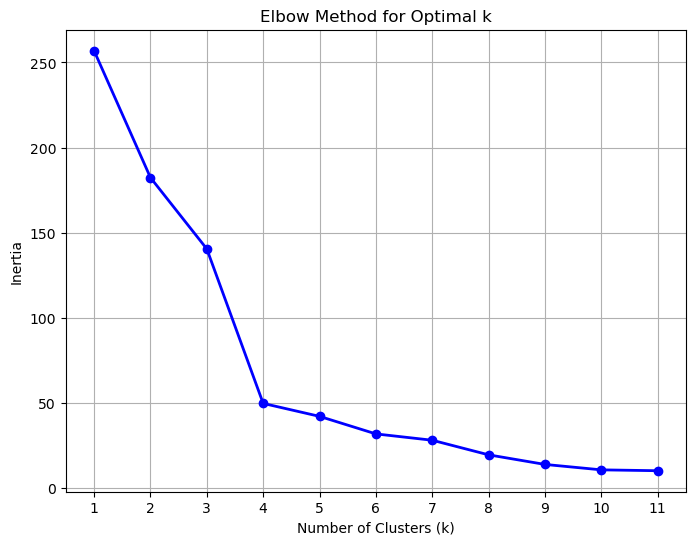

In [88]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [89]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [90]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_data_pca[['PC1', 'PC2', 'PC3']])

c:\Users\quaid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [91]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels = kmeans.predict(df_market_data_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [92]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_copy = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_copy['Cluster'] = cluster_labels

# Display the copy of the scaled PCA DataFrame
print(df_market_data_pca_copy.head(10))

                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        2
ethereum        -0.458261  0.458466  0.952877        2
tether          -0.433070 -0.168126 -0.641752        0
ripple          -0.471835 -0.222660 -0.479053        0
bitcoin-cash    -1.157800  2.041209  1.859715        2
binancecoin     -0.516534  1.388377  0.804071        2
chainlink       -0.450711  0.517699  2.846143        2
cardano         -0.345600  0.729439  1.478013        2
litecoin        -0.649468  0.432165  0.600303        2
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


In [93]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color the points based on the clusters
    cmap='Set1',  # Choose a color palette
    hover_cols=['coin_id'],  # Display the coin names on hover
    title="Cryptocurrency Clusters (PCA Components)"
)
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

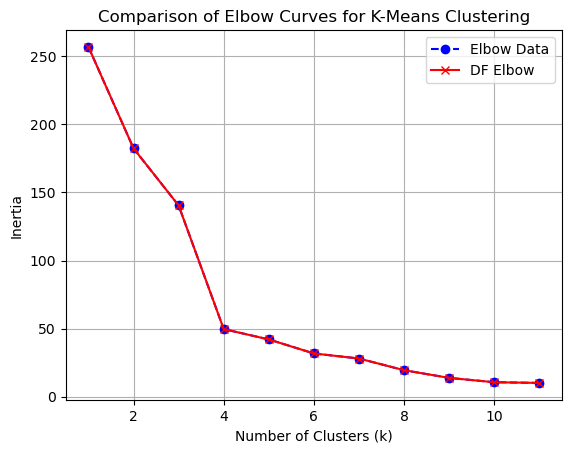

In [94]:
# Composite plot to contrast the Elbow curves
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o', linestyle='--', color='b', label='Elbow Data')
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='x', linestyle='-', color='r', label='DF Elbow')
plt.title('Comparison of Elbow Curves for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
# Composite plot to contrast the clusters
import hvplot.pandas

# Scatter plot for the scaled data
scatter_plot_scaled = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c='Cluster', 
    colormap='viridis',
    hover_cols=["coin_id"],  # Display the crypto name in the hover tool
    title="Cryptocurrency Clusters (Scaled Data)",
    width=800, 
    height=400
)

# Scatter plot for the PCA data
scatter_plot_pca = df_market_data_pca_copy.hvplot.scatter( 
    x='PC1',
    y='PC2',
    c='Cluster',  # Color the points based on the clusters
    cmap='Set1',  # Choose a color palette
    hover_cols=['coin_id'],  # Display the coin names on hover
    title="Cryptocurrency Clusters (PCA Components)"
)

# Composite plot to contrast the two scatter plots
composite_plot = scatter_plot_scaled + scatter_plot_pca

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reducing the number of features can be beneficial for computational efficiency and interpretability, but it comes with risks of losing important information and potentially underfitting the model. Dimensionality reduction techniques like PCA can mitigate some of these risks by preserving the most important variance in the data while reducing the number of features. The clustering results might still be useful, but they could be less detailed or accurate compared to when all features are used.

In summary, fewer features might lead to:

Faster clustering but potentially less accurate or less meaningful clusters.

Improved visual simplicity but with reduced granularity and detail.

A higher risk of underfitting or oversimplification of the data.